## Task

Our (hypothetical) marketing department needs some help in focussing on the most important market segment. Instead of marketing to everyone, they need our help in identifying who our most profitable customers are. Are they married or unmarried, working or retired, premium or budget buyers etc… This will help them position things better.

Also, they need help in identifying the bestselling products.

So, given the transaction data, help us identify the top 3 most profitable products and characteristics of our most loyal customers.

# Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [5]:
purchase_data=pd.read_csv('/content/purchase_behaviour.csv')
transaction_data=pd.read_csv('/content/transaction_data.csv')

## Checking basic info about the datasets

In [6]:
purchase_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
purchase_data.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [10]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [12]:
transaction_data.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


## Merging data sets based upon common column

In [13]:
data_merge=pd.merge(purchase_data,transaction_data,on='LYLTY_CARD_NBR')

In [14]:
data_merge.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [15]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264836 non-null  int64  
 1   LIFESTAGE         264836 non-null  object 
 2   PREMIUM_CUSTOMER  264836 non-null  object 
 3   DATE              264836 non-null  int64  
 4   STORE_NBR         264836 non-null  int64  
 5   TXN_ID            264836 non-null  int64  
 6   PROD_NBR          264836 non-null  int64  
 7   PROD_NAME         264836 non-null  object 
 8   PROD_QTY          264836 non-null  int64  
 9   TOT_SALES         264836 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


# Preparing Data

### Checking Null Values

In [16]:
data_merge.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


### Checking and Removing Duplicates

In [20]:
data_merge[data_merge.duplicated(keep=False)]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [19]:
data_merge.drop_duplicates(keep="first",inplace=True)

In [22]:
data_merge.reset_index(drop=True,inplace=True)

In [24]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264835 entries, 0 to 264834
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264835 non-null  int64  
 1   LIFESTAGE         264835 non-null  object 
 2   PREMIUM_CUSTOMER  264835 non-null  object 
 3   DATE              264835 non-null  int64  
 4   STORE_NBR         264835 non-null  int64  
 5   TXN_ID            264835 non-null  int64  
 6   PROD_NBR          264835 non-null  int64  
 7   PROD_NAME         264835 non-null  object 
 8   PROD_QTY          264835 non-null  int64  
 9   TOT_SALES         264835 non-null  float64
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


### Converting Date column data type to datetime

In [28]:
data_merge["DATE"]=pd.to_datetime(data_merge['DATE'], origin='1899-12-30', unit='D')

In [30]:
data_merge.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.648350e+05,264835,264835.000000,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,1.355496e+05,2018-12-30 00:52:42.252723200,135.080216,1.351584e+05,56.583201,1.907308,7.304205
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.500000
25%,7.002100e+04,2018-09-30 00:00:00,70.000000,6.760100e+04,28.000000,2.000000,5.400000
50%,1.303580e+05,2018-12-30 00:00:00,130.000000,1.351380e+05,56.000000,2.000000,7.400000
75%,2.030945e+05,2019-03-31 00:00:00,203.000000,2.027015e+05,85.000000,2.000000,9.200000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,200.000000,650.000000
std,8.058011e+04,NaN,76.784306,7.813316e+04,32.826692,0.643655,3.083231


## Detecting Anamolies

Text(0.5, 1.0, 'TOT_SALES')

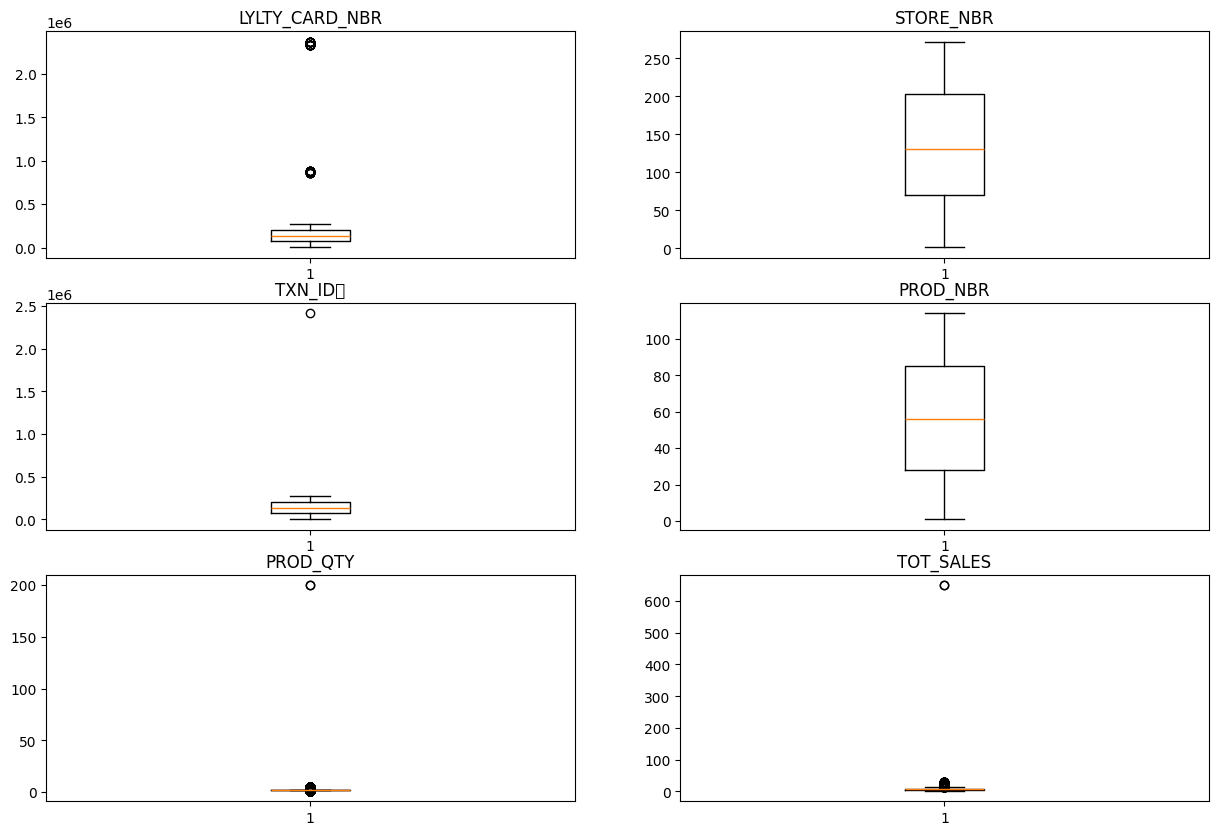

In [33]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
plt.boxplot(data_merge['LYLTY_CARD_NBR'])
plt.title('LYLTY_CARD_NBR')
plt.subplot(3,2,2)
plt.boxplot(data_merge['STORE_NBR'])
plt.title('STORE_NBR')
plt.subplot(3,2,3)
plt.boxplot(data_merge['TXN_ID'])
plt.title('TXN_ID	')
plt.subplot(3,2,4)
plt.boxplot(data_merge['PROD_NBR'])
plt.title('PROD_NBR')
plt.subplot(3,2,5)
plt.boxplot(data_merge['PROD_QTY'])
plt.title('PROD_QTY')
plt.subplot(3,2,6)
plt.boxplot(data_merge['TOT_SALES'])
plt.title('TOT_SALES')

### we can ignore 2 or 3 data points.Because they are not looking like outliers.May be they are original datapoints.So I am not removing them.

In [34]:
data_merge[data_merge["PROD_QTY"]>50]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221624,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221625,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


### Dorito Corn Chp Supreme 380g is the Most Profitable product

#Top 3 most profitable products based on total sales

In [36]:
top_products = (data_merge.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False))

In [37]:
top_products

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
Kettle Mozzarella Basil & Pesto 175g,34457.4
Smiths Crinkle Original 330g,34302.6
...,...
WW Crinkle Cut Chicken 175g,4702.2
Sunbites Whlegrn Crisps Frch/Onin 90g,4600.2
WW Crinkle Cut Original 175g,4532.2


In [38]:
top_products.head(3)

,TOT_SALES
PROD_NAME,
Dorito Corn Chp Supreme 380g,40352.0
Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [43]:
top_products=top_products.head(3)

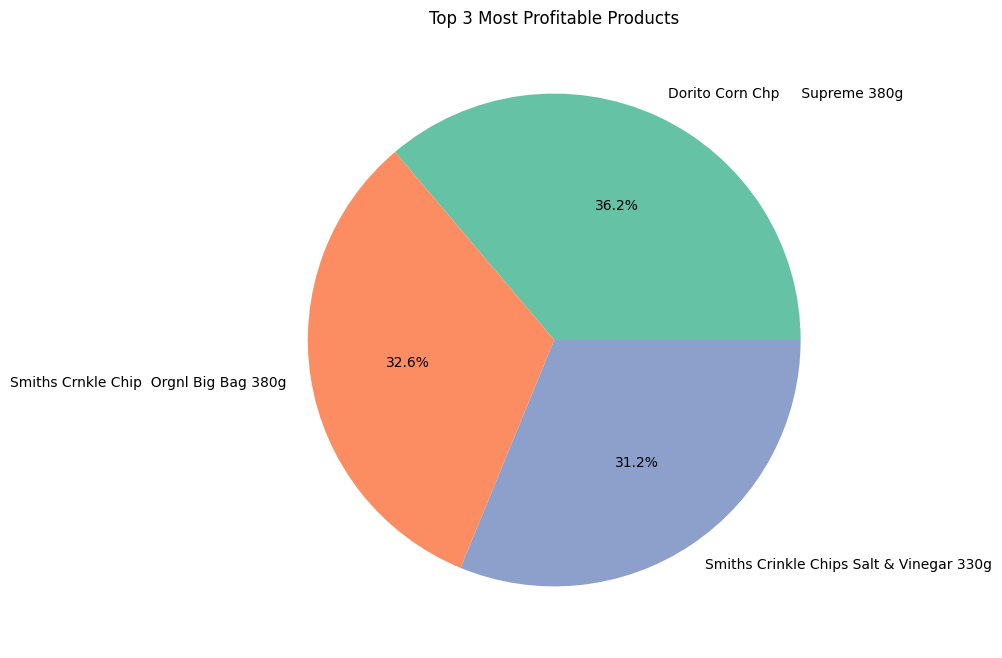

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(top_products.values, labels=top_products.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))

plt.title('Top 3 Most Profitable Products')
plt.show()

# Based on the above analysis, the Top 3 Most profitable Products are :
1.Dorito Corn Chp Supreme 380g
2.Smiths Crnkle Chip Orgnl Big Bag 380g
3.Smiths Crinkle Chips Salt & Vinegar 330g

# RFM Analysis
# Reference date for recency calculation

Actually to find the Loyal Customers, we have to understood the characterstics of a Loyal Customer.

For me a Loyal Customer means, A person

1)Who will definitely purchase something Recently

2)Who will purchase items frequently

3)Who will spent more amount

So based on above details, I found the Loyal customers.

In [49]:

reference_date = data_merge['DATE'].max()

# Calculating Recency, Frequency, and Monetary values
rfm = data_merge.groupby('LYLTY_CARD_NBR').agg({
    'DATE': lambda x: (reference_date - x.max()).days,  # Recency: Days since last purchase
    'TXN_ID': 'nunique',                               # Frequency: Number of transactions
    'TOT_SALES': 'sum'                                 # Monetary: Total amount spent
}).reset_index()

In [50]:
rfm.head()

,LYLTY_CARD_NBR,DATE,TXN_ID,TOT_SALES
0,1000,256,1,6.0
1,1002,287,1,2.7
2,1003,114,2,6.6
3,1004,240,1,1.9
4,1005,184,1,2.8


### Columns renaming for better understanding

In [51]:
rfm.columns = ['LYLTY_CARD_NBR', 'Recency', 'Frequency', 'Monetary']

### Identifying top loyal customers (high Frequency, high Monetary, low Recency)

In [52]:
loyal_customers = rfm.sort_values(by=['Frequency', 'Monetary'], ascending=[False, False]).head(10)

In [53]:
loyal_customers

,LYLTY_CARD_NBR,Recency,Frequency,Monetary
42813,162039,9,18,126.8
60925,230078,10,17,138.6
3686,13138,2,17,109.0
25958,94185,36,16,122.8
47959,179228,2,16,120.8
45905,172032,8,16,120.1
31654,116181,3,16,117.6
28605,105026,13,16,114.2
56380,213140,0,16,111.2
28457,104117,4,16,109.6


In [55]:
loyal_customers_info = pd.merge(loyal_customers,data_merge, on='LYLTY_CARD_NBR', how='left')

In [63]:
loyal_customers_info.head()

,LYLTY_CARD_NBR,Recency,Frequency,Monetary,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,162039,9,18,126.8,OLDER FAMILIES,Mainstream,2018-08-09,162,162046,86,Cheetos Puffs 165g,2,5.6
1,162039,9,18,126.8,OLDER FAMILIES,Mainstream,2018-09-06,162,162047,71,Twisties Cheese Burger 250g,2,8.6
2,162039,9,18,126.8,OLDER FAMILIES,Mainstream,2018-09-08,162,162048,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
3,162039,9,18,126.8,OLDER FAMILIES,Mainstream,2018-09-14,162,162049,56,Cheezels Cheese Box 125g,2,4.2
4,162039,9,18,126.8,OLDER FAMILIES,Mainstream,2018-10-30,162,162050,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4


## Visualizations to understood the characteristics of a Loyal Customer

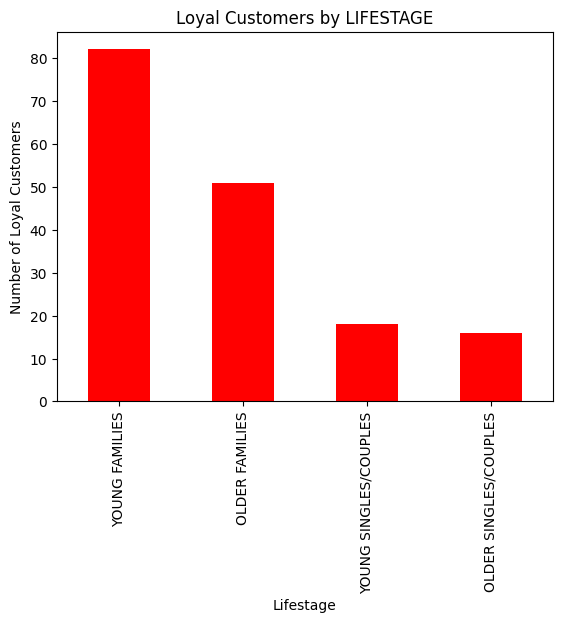

In [67]:
loyal_customers_info['LIFESTAGE'].value_counts().plot(kind='bar', color='red')
plt.title('Loyal Customers by LIFESTAGE')
plt.xlabel('Lifestage')
plt.ylabel('Number of Loyal Customers')
plt.show()

### From the above Visualization,we can say Loyal customers are from Young Families.

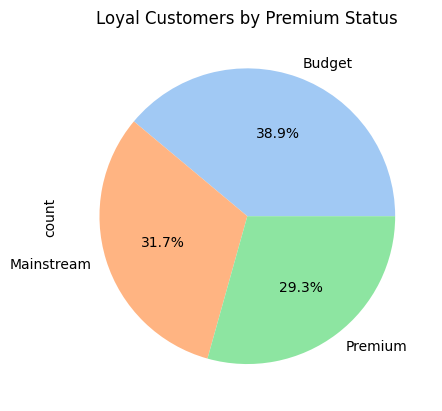

In [65]:
loyal_customers_info['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Loyal Customers by Premium Status')
plt.show()

### From the above Visualization,we can say Loyal customers are from Budget people.

# Summary of Findings :

## 1.Top 3 Most Profitable Products:

1.Dorito Corn Chp Supreme 380g

2.Smiths Crnkle Chip Orgnl Big Bag 380g

3.Smiths Crinkle Chips Salt & Vinegar 330g

# 2.Most Loyal Customers :

Actually to find the Loyal Customers, we have to understood the characterstics of a Loyal Customer.

For me a Loyal Customer means, A person

1)Who will definitely purchase something Recently

2)Who will purchase items frequently

3)Who will spent more amount

So based on above details, I found the Most Loyal Customers through RMF analysis.



# 3.Loyal Customer Characteristics:

1.Young Families(means Married and Working people)

2.Budget (They values for Money)

# Conclusion :

The analysis shows that the most loyal customers are young families who prefer budget-friendly products. They stick with the brand because it offers good value for money. Providing discounts and family-focused deals can keep them loyal. Offering affordable products will help retain them.

Additionally, Focusing on promotions for the top 3 popular products can further boost sales and customer loyalty.